## INTRODUCCION A PYTHON Y MARKDOWN

Markdown nos permite combinar texto (utilizando código html, latex o su propio código), con programación.
Ctrl + Enter: Ejecuta casilla
Ctrl + shift + Enter: Ejecuta y genera un nuevo markdown. 

### Uso de latex
    - Podemos escribir una integral
        -Modo matemático"$$" 
        -Modo matemático centrado"$$$$"
$$\int_a^b f(x)$$

    - Fracciones
$$\frac{x^2 + 1}{\sqrt{x-3}}$$
También podemos incluir código latex en el texto por ejemplo: El área de un círculo esta dada por $A = \pi r^2$. 

En Markdown, los niveles de título se definen mediante la cantidad de numerales enfrente de ellos. "##" Titulo 2,"###" Titulo 3, etc.  
Para incluir un salto de linea se deben de dar dos espacios luego de la ultima letra de la linea. 

También podemos hacer listas:  

    - Elemento 1
        -Subelemento
    - Elemento 2
    - Elemento 3 

### GENERACIÓN DE TABLAS  

| Nombre | Edad | Estatura |  
|:------:|:----:|:--------:|
| Juan | 19 | 1.70 |
| Pedro | 18 | 1.80 |
| María | 20 | 1.65 |  

Justificado de las tablas
- Centrado ":-----:"
- A la izquierda ":-----"
- A la derecha "-----:"

**TAMBIÉN PODEMOS ESCRIBIR EN NEGRITA AL UTILIZAR DOBLE ASTERISCO** 

In [ ]:
# definir una lista en python
a = []           # lista vacía
b = [1,3,5,7]
b                # Despliega la variable b
c = 10
d = "Me gusta metodos numericos"

In [ ]:
print(type(b)) # nos muestra el tipo de variable
print(type(c)) # nos muestra el tipo de variable
print(type(d)) # nos muestra el tipo de variable

In [ ]:
# Linspace genera un arreglo con numero igual........
#En este caso se le pide generar n cantidad de numeros entre el inicio y el final definidos por el tercer parametro
from pylab import *
x =  linspace(0,2*pi,100)
x
len(x)  # Nos dice el largo de un arreglo o lista

In [ ]:
#Genera una arreglo con un espacio determinado por el tercer parametro
x2 = arange(0,2*pi,0.1)
x2

In [ ]:
# range nos muestra un listado solamente de enteros , tiene hasta tres parametros incluyendo inicio fin, y salto
x3 = range(10)
print(list(x3))

## Raices de ecuaciones 

**Comenzamos a ver Metodos númericos en programación, comenzamos con el método cerrado**


In [ ]:
from pylab import *
import pandas as pd
def biseccion(a,b,f, max_iter = 100, modo_salida = 1,error =  0.05):
    # a, b limites inferior y superior del intervalo
    # función f(x). Resolvemos f(x) = 0
    # máximo error permitido
    i, xl, xr, xu, ea = 0, [a], [(a+b)/2], [b], [100]   # iteraciones, limites inferiores, puntos medios, limites superiores, error, tipo
    while ea[i] > error and i < max_iter:
        if f(xl[i])*f(xr[i])<0: # Si la raíz esta en el intervalo inferior (-)*(+) = (-)
            xl.append(xl[i])    # Mantenemos el limite inferior actual
            xu.append(xr[i])    # El nuevo límite superior es el actual punto medio.
        elif(f(xu[i])*f(xr[i])<0): # Si la raíz esta en el intervalo superior (-)*(+) = (-)
            xl.append(xr[i])    # El nuevo limite inferior es el punto medio
            xu.append(xu[i])    # Mantenemos el límite superior actual.
        else:
            return(xr)          # Posible raíz o error
        xr.append((xl[i+1]+xu[i+1])/2) # Nuevo punto medio, calculado con los nuevos xl y xu, estos pueden tener el mismo valor que el anteior en caso se copiaran.
        ea.append(abs((xr[i+1]-xr[i])/xr[i+1])*100) # Error relativo, (si ya no cambia mucho puede que estemos en la solución)
        i+=1
    if modo_salida == 1:
        return {"xL": xl, "xr": xr, "xu": xu, "error": ea}
    elif modo_salida == 2:
        return {"solucion": xr[-1], "iteraciones": i}
    elif modo_salida == 3:
        return {"solucion": xr[-1]}
    else:
        raise ValueError("modo_salida debe ser 1, 2 o 3.")
f = lambda x: exp(-x)-x 
resultado1 = biseccion(1,4,f,max_iter=100, modo_salida=1)
pd.DataFrame(resultado1)

**Continuamos con métodos cerrados, ahora utilizamos Método de falsa posición**

In [ ]:
from pylab import *
import pandas as pd
def falsa_posicion(a,b,f,error =  0.05):
    m = (f(b)-f(a))/(b-a)
    # a, b limites inferior y superior del intervalo
    # función f(x). Resolvemos f(x) = 0
    # máximo error permitido
    xri = a - f(a)/m
    i, xl, xr, xu, ea = 0, [a], [xri], [b], [100]
    while ea[i] > error:
        if f(xl[i])*f(xr[i])<0: # Valuamos el valor i en la lista, se inicia con 0
            xl.append(xl[i])
            xu.append(xr[i])
        elif(f(xu[i])*f(xr[i])<0):
            xl.append(xr[i])
            xu.append(xu[i])
        else:
            return(xr)
        "Se redefinen las variables para acortar el rango, como ya hicimos un append hacemos uno nuevo"
        m = (f(xu[i+1])-f(xl[i+1]))/(xu[i+1]-xl[i+1])
        xri = xl[i+1] - f(xl[i+1])/m
        xr.append(xri)
        ea.append(abs((xr[i+1]-xr[i])/xr[i+1])*100)
        i+=1
    return xl, xr, xu, ea

def f(x):
    return exp(-x)-x
def df(x):
    return -exp(-x)-1

xl, xr, xu, ea = falsa_posicion(0,1,f)


datos = {"xL": xl, "xr": xr, "xu": xu, "error": ea}
pd.DataFrame(datos)

**Métodos Abiertos** 

 - No existe la seguiridad de convergencia, pero son muy rápidos.
 - Solo necesita un valor inicial, y cálcula la recta tangente a el hasta que corta en 0, itera hasta que se acerca al resultado real. (Dónde f(x) corta en 0)
 - Este método tiene una convergencia cuadrática, el porcentaje de error se reduce con un tamaño de paso ^2.

In [ ]:
def NewtonR(x0,f,df,error = 0.05):
    i, xr, ea = 0, [x0], [100]
    while ea[i] > error:
        xr.append(xr[i]-f(xr[i])/df(xr[i]))
        i+= 1
        ea.append(abs((xr[i]-xr[i-1])/xr[i])*100)
    return xr, ea
xr, ea = NewtonR(10,f,df)
res = {"XR" : xr, "ERROR" : ea}
pd.DataFrame(res)

**Metodo de la secante**
 
En este caso se utilizan diferencias finitas para estimar la pendiente. Se utiliza el valor $X_0$ y $X_{0 + delta}$. 

**Método de punto fijo** 

Se utiliza un punto fijo en el espacio y se busca la intersección con con la recta X, esto se realiza de forma iterativa, en una espiral parecida a un metal. Tiene un problema , con la pendiente, sin embargo mediante el teorema del valor medio nos perite encontrar la pendiente de la resta secante.

***Util para resolver sistemas de ecuaciones, mediante una generalizacion*** 




In [ ]:
from pylab import *
import pandas as pd
def secante(x0,f,h,error = 0.005):
    i,x,ea = 0, [x0],[100]
    while ea[i] > error:
        msec = (f(x[i]+h)-f(x[i]))/h    # Estimación de la pendiente
        x.append(x[i]-f(x[i])/msec)
        ea.append(abs((x[i+1]-x[i])/x[i+1])*100)
        i+=1
    datos  = {"X": x,"error": ea }
    res  = pd.DataFrame(datos)
    return res

f = lambda x: exp(-x) -x
secante(10,f,0.1)

In [ ]:
def PuntoFijo(x0,g,error = 0.005):
    i,x,ea = 0,[x0],[100]
    while ea[i] > error:
        x.append(g(x[i]))
        ea.append(abs((x[i+1]-x[i])/x[i+1])*100)
        i+=1
    datos  = {"X": x,"error": ea }
    res  = pd.DataFrame(datos)
    return res
f = lambda x: exp(-x) -x
g = lambda x: exp(-x)
PuntoFijo(10,g,0.1)

## Sistemas de ecuaciones

**Sistemas de ecuaciones**

La solución del sistema es la intersección de las ecuaciones, o la intersección de los planos en caso tengamos más de dos ecuaciones.

Las ecuaciones se pueden escribir de forma matricial. 

Los sistemas pueden presentar diversos problemas, entre ellos:
    - determinante de (A) = 0, esto ocurre cuando las pendientes m son iguales.
    - determinante de (A) ~ 0, puede llevar a un sistema mal condicionado (las funciones son iguales para más de un punto),un pequeño cambio en los coeficientes generan grandes cambios en la solución. 

Numero de condición: 

$$cond(A)=∥A∥⋅∥A^{−1}∥$$

Existen diversos metodos para obtener el valor de condición de una matriz, donde :
$$cond(A) ~ 1$$ 
indica una matriz bien condicionada
$$cond(A) >> 1$$ 
indica una matriz mal condicionada 

En general se utiliza la norma 2. 

**JACOBI**

Realizamos un excel para el metodo JACOBI. JACOBI converge si A es estrictamente diagonal dominante. (Es cuando el elemento de la diagonal es mas grande que la suma de los elementos de su fila.) 

\begin{matrix}
    12 & 3 & -5 \\
    1 & 5 & 3 \\
    3 & 7 & 13 \\
\end{matrix}

Donde  

 12 > 3 + 5 

  5 > 1 + 3 
 
 13 > 3 + 7

**GAUSS SEIDEL**

En el mismo excel tenemos el metodo de GAUSS SEIDEL

In [1]:
import numpy as np
import pandas as pd

def JACOBI(A, b, max_iter=100, error=1e-2):
    """
    Argumentos:
    A: Matriz cuadrada(n x n)
    b: Vector (n)
    max_iter: Máximo número de iteraciones
    error: Tolerancia para convergencia
    
    Returns:
    tabla: Lista de iteraciones [i, x1, x2, ..., xn]
    solucion: Vector solución final 
    """
    # Numero de incognitas o ecuaciones a trabajar
    n = len(b)  

    # Programación defensiva
    if A.shape != (n, n):
        raise ValueError("La matriz A debe ser cuadrada, n filas n columnas. Vector b tiene n elementos")
    if np.any(np.diag(A) == 0):
        raise ValueError("La diagonal de A no puede tener ceros")
    
    # Inicializar tabla
    tabla = [] 
    x_actual = np.zeros(n)
    tabla.append([0] + x_actual.tolist())
    
    # Iteraciones
    for k in range(1, max_iter + 1):
        x_nuevo = np.zeros(n)
        
        for i in range(n):
            # Suma de a_ij * x_j para j != i (elimina la diagonal)
            suma = np.dot(A[i, :], x_actual) - A[i, i] * x_actual[i]
            x_nuevo[i] = (b[i] - suma) / A[i, i]
        
        # Agregar a la tabla
        tabla.append([k] + x_nuevo.tolist())
        
        # Porcentaje de error
        if np.linalg.norm(x_nuevo - x_actual) < error:
            break
            
        x_actual = x_nuevo.copy() # Para no perder los valores actuales
    
    return tabla, x_actual

print("\n--- Inciso a ---")
A0 = np.array([[1, 1, 3],
              [3, 5, 1],
              [4, 1, 2]], dtype=float)
b0 = np.array([3, 7, 4], dtype=float)

tabla0, sol0 = JACOBI(A0, b0, max_iter=5)

df0 = pd.DataFrame(tabla0, columns=['Iteración'] + [f'x{i+1}' for i in range(len(b0))])
print(df0)


--- Inciso a ---
   Iteración      x1      x2     x3
0          0    0.00   0.000   0.00
1          1    3.00   1.400   2.00
2          2   -4.40  -0.800  -4.70
3          3   17.90   4.980  11.20
4          4  -35.58 -11.580 -36.29
5          5  123.45  30.006  78.95


In [2]:
import numpy as np
import pandas as pd

def gauss_seidel(A, b, x0=None, error=1e-2, max_iter=1000):
    """
    Argumentos:
        A: Matriz de coeficientes (n x n)
        b: Vector (n)
        x0: Vector inicial (por si tenemos idea de donde esta la solución)
        error: Tolerancia para convergencia
        max_iter: Número máximo de iteraciones
    
    Retorna:
        tabla: Lista de interaciones[i, x1, x2, ...]
        solucion: Vector solución
    """
    # Numero de variables que vamos a resolver
    n = len(b)
    
    # Programación defensiva
    if A.shape != (n, n):
        raise ValueError("La matriz A debe ser cuadrada, n filas n columnas. Vector b tiene n elementos")
    if np.any(np.diag(A) == 0):
        raise ValueError("La diagonal de A no puede tener ceros")
    
    # Inicialización
    tabla = []
    x = np.zeros(n) if x0 is None else x0.copy() # Si ya conocemos donde mas o menos esta la respuesta podemos iniciar un valor cercarno
    tabla.append([0] + x.tolist())
    
    # Iteraciones
    for k in range(1, max_iter + 1):
        x_anterior = x.copy()
        
        for i in range(n):
            # Suma de a_ij*x_j usando el valor actual
            suma = 0.0
            for j in range(n):
                if j != i:
                    suma += A[i, j] * x[j]
            
            # Actualización el valor actual
            x[i] = (b[i] - suma) / A[i, i]
        
        # Registrar iteración
        tabla.append([k] + x.tolist())
        
        # Porcentaje de eror
        if np.linalg.norm(x - x_anterior) < error:
            break
    
    return tabla, x


print("\n--- Inciso a ---")
A0 = np.array([[1, 1, 3],
              [3, 5, 1],
              [4, 1, 2]], dtype=float)
b0 = np.array([3, 7, 4], dtype=float)

tabla0, sol0 = gauss_seidel(A0, b0, max_iter=5)

df0 = pd.DataFrame(tabla0, columns=['Iteración'] + [f'x{i+1}' for i in range(len(b0))])
print(df0)


--- Inciso a ---
   Iteración         x1          x2          x3
0          0     0.0000     0.00000     0.00000
1          1     3.0000    -0.40000    -3.80000
2          2    14.8000    -6.72000   -24.24000
3          3    82.4400   -43.21600  -141.27200
4          4   470.0320  -252.36480  -811.88160
5          5  2691.0096 -1450.82944 -4654.60448


**Método directo LU**

In [3]:
import numpy as np
import pandas as pd

def lu_simplificado(A, b):
    """
    Resuelve Ax = b con descomposición LU manual
    Devuelve solo los resultados esenciales
    
    Argumentos:
        A: Matriz cuadrada (n x n)
        b: Vector (n)
    
    Returns:
        DataFrame con resultados
        Vector solución x
    """
    n = A.shape[0]
    U = A.copy().astype(float)
    L = np.eye(n)
    P = np.eye(n)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(U[k:, k])) + k
        if max_row != k:
            U[[k, max_row]] = U[[max_row, k]]
            P[[k, max_row]] = P[[max_row, k]]
            if k > 0:
                L[[k, max_row], :k] = L[[max_row, k], :k]
        
        # Eliminación
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
    
    # Resolver sistema
    y = np.linalg.solve(L, P @ b)
    x = np.linalg.solve(U, y)
    return x

A0 = np.array([[1, 1, 3],
              [3, 5, 1],
              [4, 1, 2]], dtype=float)
b0 = np.array([3, 7, 4], dtype=float)

# Resolver y mostrar
solucion0 = lu_simplificado(A0, b0)

print("\n=== Inciso A ===")
print("\nVector solución:")
print(np.array2string(solucion0, precision=6, suppress_small=True))



=== Inciso A ===

Vector solución:
[0.5 1.  0.5]


## **Ajuste de curvas**

Para el trabajo de puntitos (resultado de mediciones, parecido a un diagrama de dispersión).

- Polínomio interpolante de lagrange

    Dados n+1 puntos, es el polinomio de grado n que pasa por todos ellos
    $$P_x = a_0 + a_1x +a_2x^2 + a_3x^3$$ 
 
    Este modelo me genera un sistema de ecuaciones, donde:
    
    \begin{matrix}
    a_0 & a_1x_{1} & a_2x_{1}^2 & a_3x_{1}^3\\
    a_0 & a_1x_{2} & a_2x_{2}^2 & a_3x_{2}^3\\
    a_0 & a_1x_{3} & a_2x_{3}^2 & a_3x_{3}^3\\
    a_0 & a_1x_{4} & a_2x_{4}^2 & a_3x_{4}^3\\
    \end{matrix}
    
    \begin{matrix}
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
    \end{matrix}
    
Ejercicio. Calcular el polinomio interpolante de lagrange

\begin{matrix}
x & y\\
1 & 3\\
2 & 5\\
3 & 9\\
4 & 4\\
5 & 5\\
\end{matrix}

***ENTENDIENDO POLINOMIOS EN PYTHON***

$$P(X) =x^{2}-1$$
$$Q(X) = x^{3}+1$$
$$R(X) = (x-1)(x+1/2)(x-4)$$

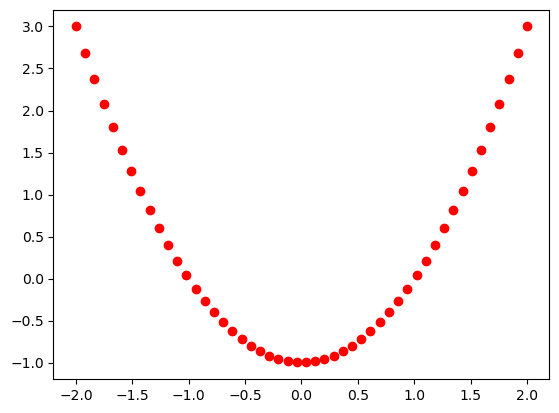

In [6]:
from pylab import *
p = poly1d([1,0,-1]) # Genera un polinomio
p(2)    # Acepta notación funcional (de funcion)
x = linspace(-2,2)
y1 = p(x)
plot(x,y1,"ro")

array([-1. +0.j       ,  0.5+0.8660254j,  0.5-0.8660254j])

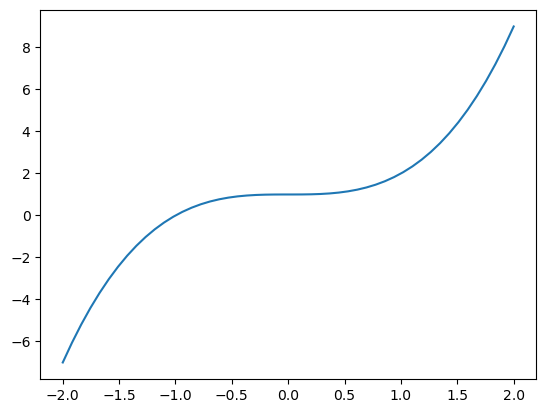

In [7]:
q = poly1d([1,0,0,1])
plot(x,q(x))

# Calcular raices

roots(q)

In [8]:
r = poly1d([1,-1/2,4], True) # True, le estoy dando las raices
roots(r) 

array([ 4. ,  1. , -0.5])

### Polinomio interpolante

**NO USAR**

       4         3         2
1.083 x - 12.67 x + 49.92 x - 75.33 x + 40


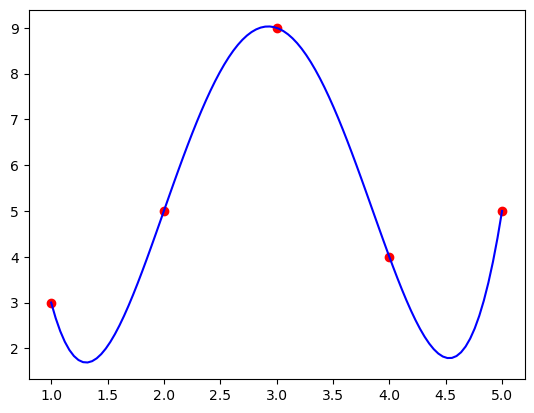

In [9]:
import scipy.interpolate as si
xi = [1,2,3,4,5]
yi = [3,5,9,4,5]
p1 = si.lagrange(xi,yi)
print(p1)

# Evaluar el polinomio
x =  linspace(min(xi), max(xi), 100)
plot(xi,yi,"ro",x,p1(x),"b-")


### FENÓMENO DE RUNGE

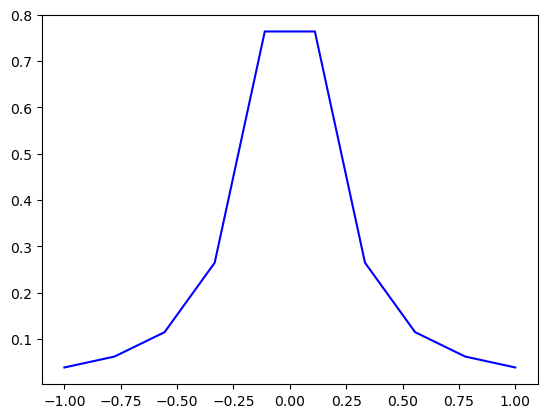

In [14]:
x = linspace(-1,1,10)
y = 1/(1+25*x**2)
plot(x,y,"b-")


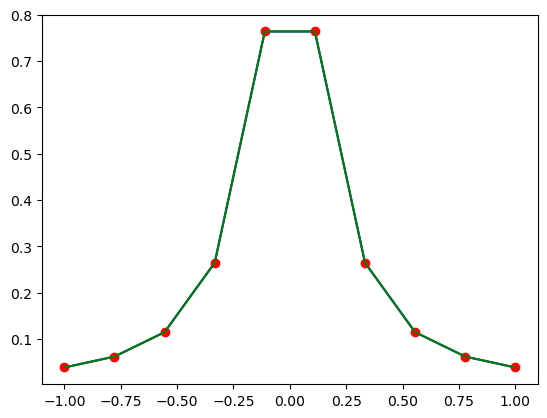

In [15]:
xi = linspace(-1,1,10)
yi = 1/(1+25*x**2)
# POLINOMIO INTERPOLANTE
p2 = si.lagrange(xi,yi)

plot(x,y,"b-",xi,yi,"ro",x,p2(x),"g-") # genero el polinomio interpolante, evaluo el polinomio interpolante en lo de 100

### **Trazadores(Splines)** 

Un trazador divide en regiones el espacio entre cada uno de los puntos de la muestra. Esto se llama trazador lineal, encargados de pasar por todos los puntos. Cada zona se denomina normalmente como $S_1 , S_2 , S_3$. 

**Trazador de orden 2** 

Un trazador de orden dos utiliza un modelo parabolico en lugar de uno lineal. (Unimos con curvas en lugar de lineas rectas). Debe de pasar por los puntos (el $R^2$ del análisis estádistico no funciona en este caso, daria 1 pero no seria verdadero).

- Caracteristicas
    - Tenemos 3n cantidad de incognitas para n cantidad de secciones.

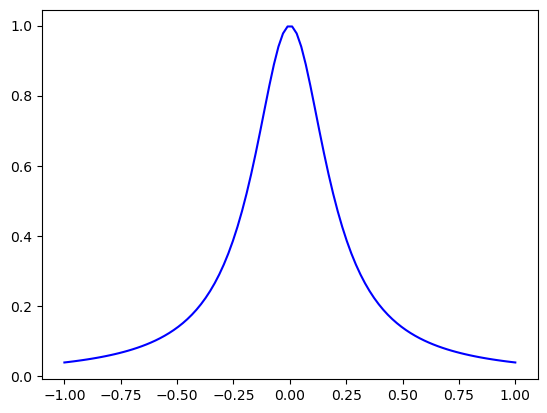

In [30]:
from pylab import *
x = linspace(-1,1,100)
y = 1/(1+25*x**2)
plot(x,y,"b-")

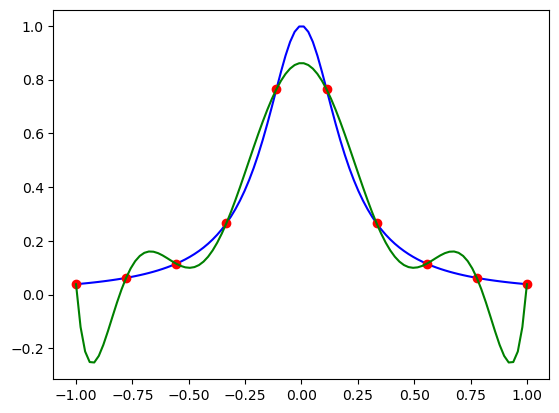

In [31]:
import scipy.interpolate as si
xi = linspace(-1,1,10)
yi = 1/(1+25*xi**2)
#plot(x,y,"b-",xi,yi,"ro")
pL = si.lagrange(xi,yi)
plot(x,y,"b-",xi,yi,"ro",x,pL(x),"g-") # genero el polinomio interpolante, evaluo el polinomio interpolante en lo de 100

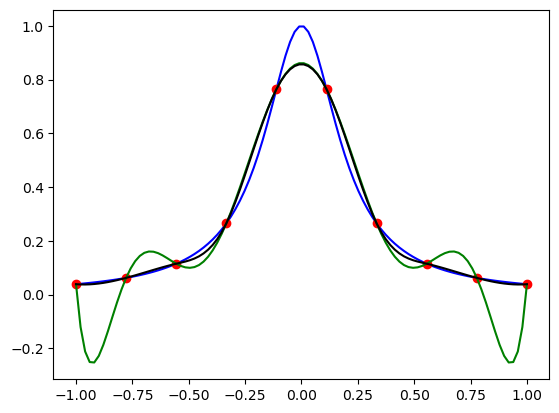

In [32]:
from pylab import *
import scipy.interpolate as si
xi = linspace(-1,1,10)
yi = 1/(1+25*xi**2)
#plot(x,y,"b-",xi,yi,"ro")

#Polinomio Interpolante
pL = si.lagrange(xi,yi)

#TRAZADORES
tck = si.splrep(xi, yi, k=3)  # calcula el spline lineal
yT1 = si.splev(x, tck)  # evalúa el spline en los puntos x

plot(x,y,"b-",xi,yi,"ro",x,pL(x),"g-", x, yT1,"k-") # genero el polinomio interpolante, evaluo el polinomio interpolante en lo de 100

### **Mínimos cuadrados**